# SNPs: Sensitivity analysis

In [2]:
from SALib.sample import saltelli, fast_sampler
import pandas as pd
from Sensitivity import Sensitivity
import joblib

model_path = "../models/BMI-SNP/"
output_path = "../output/data/"
plots_path = "../output/plots/"

In [3]:
# parameter dictionary
problem = {
    'num_vars': 3,
    'names': ['random-mating', 'genetic-variance', 'fertility-differential'],
    'bounds': [[0, 1.0],
               [0, 0.50],
               [0, 0.30]]
}

# EFast

In [3]:
sample_parameters = False
if (sample_parameters):
    param_values = fast_sampler.sample(problem, 2000)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'genetic-variance', 'fertility-differential']
    t.to_csv(model_path + "data/param-snp-efast.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-snp-efast.csv")
t.shape

(6000, 3)

In [4]:
# read data
df = pd.read_csv(output_path + "results-snp-efast.csv", sep = ";")
cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-snp-efast.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df["iteration"] = pd.to_numeric(df["iteration"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]

# select parameters
vars = ['p_fertility_factor', 'p_random_mating', 'p_genetic_variance']
X = df.loc[:,vars]

<ipython-input-4-28a1c4a50fc9>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)


In [5]:
params.head()

iteration  replicate  init_pop fertility_type mating_type  \
0          1          1      8000       additive    logistic   
1         10          1      8000       additive    logistic   
2        100          1      8000       additive    logistic   
3       1000          1      8000       additive    logistic   
4       1001          1      8000       additive    logistic   

   p_genetic_variance  p_vertical_trans_variance  p_leakage  p_random_mating  \
0            0.306359                        0.0        0.1         0.612718   
1            0.310859                        0.0        0.1         0.853718   
2            0.355859                        0.0        0.1         0.736282   
3            0.194141                        0.0        0.1         0.636282   
4            0.193641                        0.0        0.1         0.387282   

   p_fertility_factor  
0            0.183815  
1            0.267515  
2            0.095485  
3            0.125485  
4            0.116185

## Proportion obese

                              S1        ST   S1_conf   ST_conf
random-mating           0.108862  0.230304  0.004428  0.016869
genetic-variance        0.481297  0.684633  0.003771  0.020202
fertility-differential  0.189096  0.336583  0.004009  0.019767


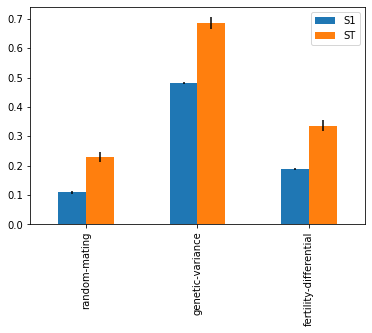

In [6]:
ef = Sensitivity(problem, df['g4'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'snp-efast-prop-obese.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'obese', 'y':'random mating', 'x':'fertility', 'z':'genes'})

sav = {
    'ef_obese_s1': ef.tabval('S1'),
    'ef_obese_st': ef.tabval('ST')
}

## Average BMI

                              S1        ST   S1_conf   ST_conf
random-mating           0.097207  0.184699  0.003529  0.019570
genetic-variance        0.506199  0.663692  0.003768  0.019835
fertility-differential  0.226997  0.350188  0.003882  0.017581


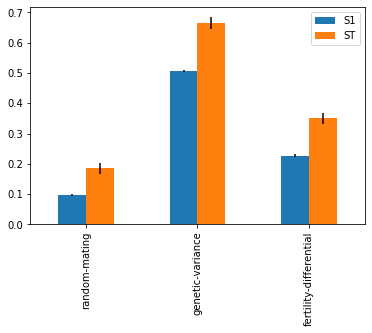

In [7]:
ef = Sensitivity(problem, df['average_bmi'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'snp-efast-average-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'average bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})
sav['ef_avg_s1'] = ef.tabval('S1')
sav['ef_avg_st'] = ef.tabval('ST')


## BMI SD

                              S1        ST   S1_conf   ST_conf
random-mating           0.148267  0.520969  0.003890  0.019909
genetic-variance        0.307910  0.720511  0.004721  0.017489
fertility-differential  0.077537  0.397177  0.003688  0.017437


['efast-snp.pkl']

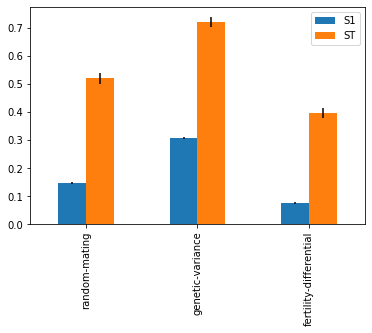

In [8]:
ef = Sensitivity(problem, df['sd_bmi'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'snp-efast-sd-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'sd bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})
sav['ef_sd_s1'] = ef.tabval('S1')
sav['ef_sd_st'] = ef.tabval('ST')
sav['names'] = ef.Sif['names']

# save output
v = ef.createRows(sav)
joblib.dump(v, 'efast-snp.pkl')


# Sobol

In [4]:
sample_parameters = False
if (sample_parameters):
    param_values = saltelli.sample(problem, 2**11)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'genetic-variance', 'fertility-differential']
    t.to_csv(model_path + "data/param-snp-sobol.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-snp-sobol.csv")
len(t)

16384

In [5]:
# read data
df = pd.read_csv(output_path + "results-snp-sobol.csv", sep = ";")
print(df.shape)
cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-snp-sobol.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df["iteration"] = pd.to_numeric(df["iteration"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]

# select parameters
vars = ['p_fertility_factor', 'p_random_mating', 'p_genetic_variance']
X = df.loc[:,vars]


(16384, 11)


<ipython-input-5-3290f5cf4f77>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)


In [6]:
params.head()

iteration  replicate  init_pop fertility_type  p_genetic_variance  \
0          1          1      8000       additive            0.156860   
1         10          1      8000       additive            0.406860   
2        100          1      8000       additive            0.188110   
3       1000          1      8000       additive            0.210571   
4      10000          1      8000       additive            0.114136   

   p_random_mating  p_fertility_factor  
0         0.000732            0.220239  
1         0.246826            0.070239  
2         0.313232            0.239429  
3         0.864014            0.199585  
4         0.158447            0.252466

## Proportion obese

                              ST   ST_conf
random-mating           0.304700  0.033397
genetic-variance        0.657539  0.053884
fertility-differential  0.341643  0.038178
                              S1   S1_conf
random-mating           0.144428  0.037321
genetic-variance        0.428707  0.045119
fertility-differential  0.188458  0.035036
                                                  S2   S2_conf
(random-mating, genetic-variance)           0.105429  0.079294
(random-mating, fertility-differential)     0.027101  0.064278
(genetic-variance, fertility-differential)  0.088145  0.077961


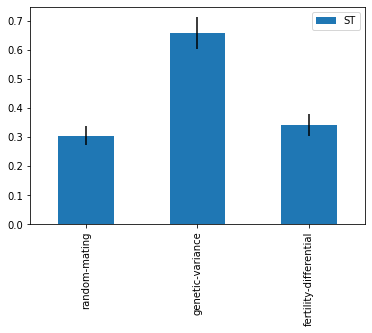

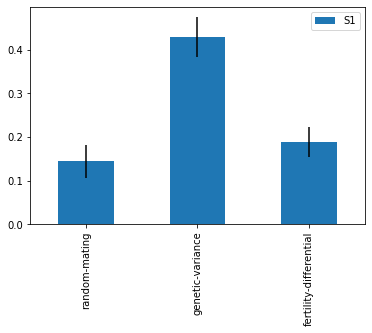

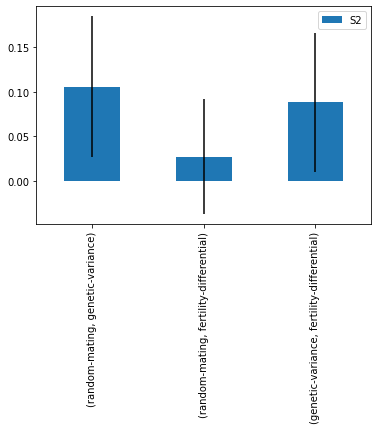

In [9]:
sb = Sensitivity(problem, df['g4'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'snp-sobol-prop-obese.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'obese', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

# sav = {
#     'sb_obese_s1': ef.tabval('S1'),
#     'sb_obese_s2': ef.tabval('S2'),
#     'sb_obese_st': ef.tabval('ST')
# }


In [20]:
print(sb.Sif['S2'])


tt  = sb.Sif

tt

[[       nan 0.10542858 0.02710052]
 [       nan        nan 0.08814532]
 [       nan        nan        nan]]


{'S1': array([0.14442814, 0.42870714, 0.18845816]),
 'S1_conf': array([0.03732117, 0.04511934, 0.03503624]),
 'ST': array([0.30469999, 0.657539  , 0.34164347]),
 'ST_conf': array([0.03339691, 0.05388403, 0.03817848]),
 'S2': array([[       nan, 0.10542858, 0.02710052],
        [       nan,        nan, 0.08814532],
        [       nan,        nan,        nan]]),
 'S2_conf': array([[       nan, 0.07929394, 0.06427812],
        [       nan,        nan, 0.07796074],
        [       nan,        nan,        nan]])}

## Average BMI

                              ST   ST_conf
random-mating           0.237658  0.021794
genetic-variance        0.634381  0.053183
fertility-differential  0.369272  0.040055
                              S1   S1_conf
random-mating           0.126786  0.030088
genetic-variance        0.457837  0.046534
fertility-differential  0.237061  0.033505
                                                  S2   S2_conf
(random-mating, genetic-variance)           0.069206  0.060237
(random-mating, fertility-differential)     0.020889  0.055254
(genetic-variance, fertility-differential)  0.077417  0.082992


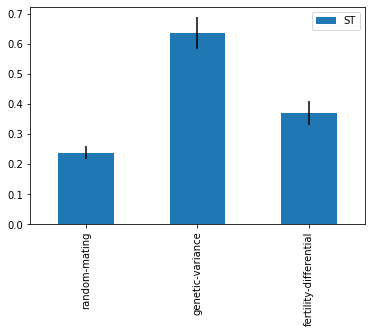

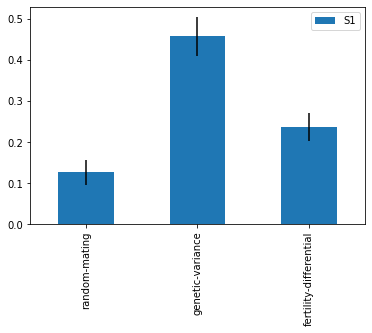

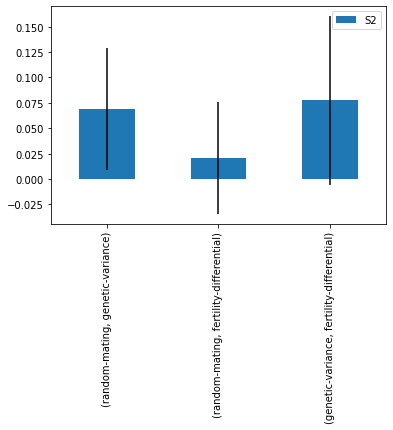

In [8]:
ef = Sensitivity(problem, df['average_bmi'], X)
ef.score('sobol')
ef.plot(save=True, filepath= plots_path + 'snp-sobol-average-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'avearge bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

## BMI SD

                              ST   ST_conf
random-mating           0.586884  0.077750
genetic-variance        0.712250  0.098804
fertility-differential  0.391129  0.071092
                              S1   S1_conf
random-mating           0.196759  0.052895
genetic-variance        0.309512  0.069916
fertility-differential  0.050327  0.034798
                                                  S2   S2_conf
(random-mating, genetic-variance)           0.190580  0.121556
(random-mating, fertility-differential)     0.081399  0.117653
(genetic-variance, fertility-differential)  0.122397  0.110307


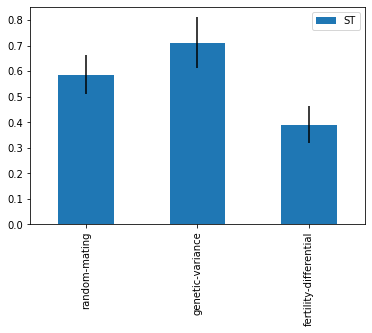

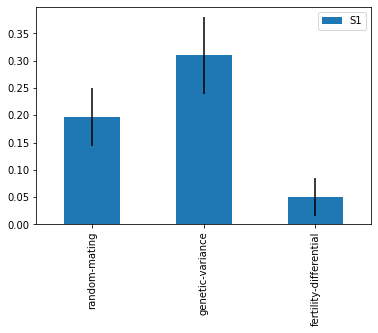

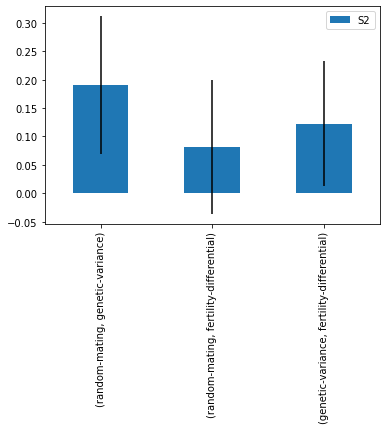

In [14]:
ef = Sensitivity(problem, df['sd_bmi'], X)
ef.score('sobol')
ef.plot(save=True, filepath= plots_path + 'snp-efast-sd-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'sd bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})